In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [37]:
# Upload your CSV file
import io
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer (1).csv


In [27]:
# Split full features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Read the CSV
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

In [39]:
# Prepare the dataset
df.drop(['id'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [40]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [41]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Train SVM with Linear and RBF kernels
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)

SVC()

In [44]:
# Visualize decision boundary using 2D data
# Use only first 2 features for this
X_2d = X.iloc[:, :2]
X_train_2d, _, y_train_2d, _ = train_test_split(X_2d, y, test_size=0.3, random_state=42)

scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)

svm_2d_linear = SVC(kernel='linear')
svm_2d_linear.fit(X_train_2d_scaled, y_train_2d)

svm_2d_rbf = SVC(kernel='rbf')
svm_2d_rbf.fit(X_train_2d_scaled, y_train_2d)

SVC()

In [45]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

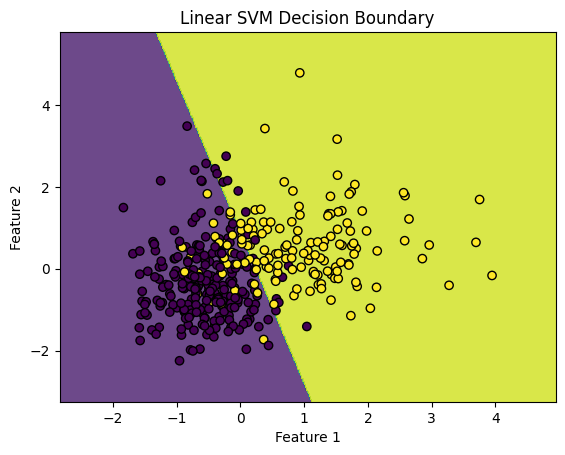

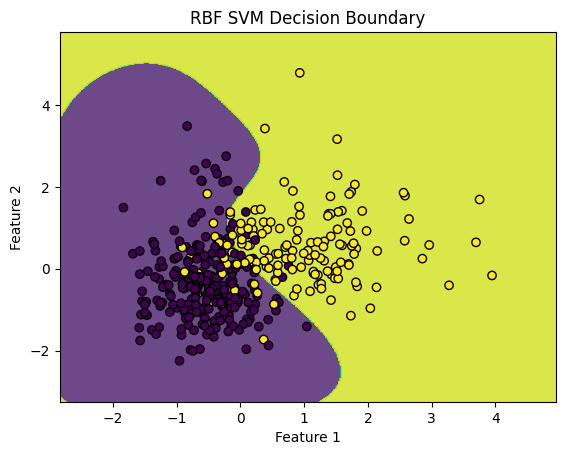

In [46]:
# Plot decision boundaries
plot_decision_boundary(svm_2d_linear, X_train_2d_scaled, y_train_2d, "Linear SVM Decision Boundary")
plot_decision_boundary(svm_2d_rbf, X_train_2d_scaled, y_train_2d, "RBF SVM Decision Boundary")


In [47]:
# Hyperparameter tuning + cross-validation
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters from GridSearchCV:", grid.best_params_)

Best Parameters from GridSearchCV: {'C': 10, 'gamma': 0.01}


In [48]:
# Final model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Data: 0.9883040935672515
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

